# Solutions - Word Shift Graphs  — Comparing Shakespeare Plays

In this notebook, we will be comparing Shakespeare comedies vs tragedies. To do so, we will be using the `Shifterator` package, and we will be making word shift graphs.

What we need to make word shift graphs with `Shifterator` is **two dictionaries for our two corpora** — dictionaries that have keys as words and values as how many times the words show up in the corpora. To make these dictionaries, we will go over how to use `Counter()` and how to transform multiple text files into dictionaries of word counts.

## Make a Word Tokenizer

Make sure to run all of these cells and create these variables. If you're unsure, check your Variable Inspector.

In [1]:
from collections import Counter
import re

In [2]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp']

In [3]:
def tokenize_words(text):
    lowercase_text = text.lower()
    split_words = re.split("\W+", lowercase_text)
    meaningful_words = [word for word in split_words if word not in stopwords]
    return meaningful_words

In [4]:
tokenize_words("I love Seattle!!!")

['love', 'seattle', '']

## Make Shakepeare's Comedies and Tragedies Into Dictionaries

In [5]:
import glob

In [6]:
comedy_filenames = glob.glob('../shakespeare-data/comedies/*')

In [7]:
tragedy_filenames = glob.glob('../shakespeare-data/tragedies/*')

In [8]:
comedy_filenames

['../shakespeare-data/comedies/much-ado-about-nothing_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/the-winters-tale_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/the-merchant-of-venice_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/loves-labors-lost_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/troilus-and-cressida_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/a-midsummer-nights-dream_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/pericles_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/the-merry-wives-of-windsor_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/as-you-like-it_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/cymbeline_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/alls-well-that-ends-well_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/the-tempest_TXT_FolgerShakespeare.txt',
 '../shakespeare-data/comedies/the-taming-of-the-shrew_TXT_FolgerSh

In [10]:
comedy_counts = Counter()

for filename in comedy_filenames:
    
    full_text = open(filename, mode='r', encoding='utf-8').read()
    words = tokenize_words(full_text)
    comedy_counts.update(words)

In [11]:
tragedy_counts = Counter()

for filename in tragedy_filenames:
    
    full_text = open(filename, mode='r', encoding='utf-8').read()
    words = tokenize_words(full_text)
    tragedy_counts.update(words)

## Word Shift Graphs — Proportion Shift

## Import Packages

In [ ]:
#!pip install shifterator

In [12]:
import shifterator as sh
import warnings
warnings.filterwarnings("ignore")

## 🛑  Pause!
Before you run this cell, take a few minutes and make predictions about what words you think are going to be the most relatively frequent in Shakespeare's comedies vs tragedies. Jot down a few thoughts.

In [ ]:
# Your thoughts

## 🚦 Go!

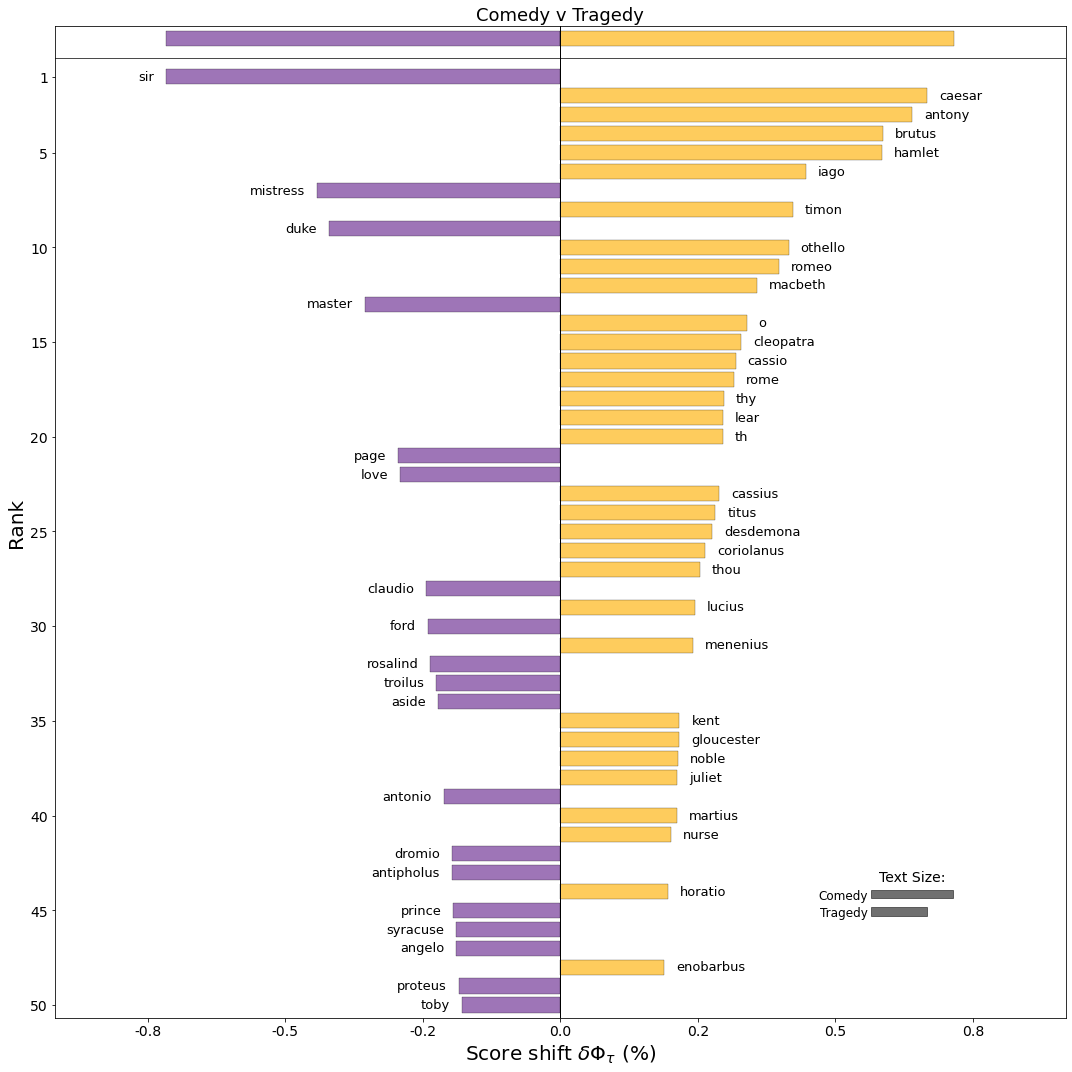

<AxesSubplot:title={'center':'Comedy v Tragedy'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [13]:
proportion_shift = sh.ProportionShift(type2freq_1 = comedy_counts,
                                    type2freq_2= tragedy_counts)

proportion_shift.get_shift_graph(system_names = ['Comedy', 'Tragedy'],  width=15, height=15, cumulative_inset=False,  top_n = 50, title= 'Comedy v Tragedy' )

## Word Shift Graphs — Sentiment Analysis

You can see the full list of possible sentiment lexicons here: https://github.com/ryanjgallagher/shifterator/tree/master/shifterator/lexicons

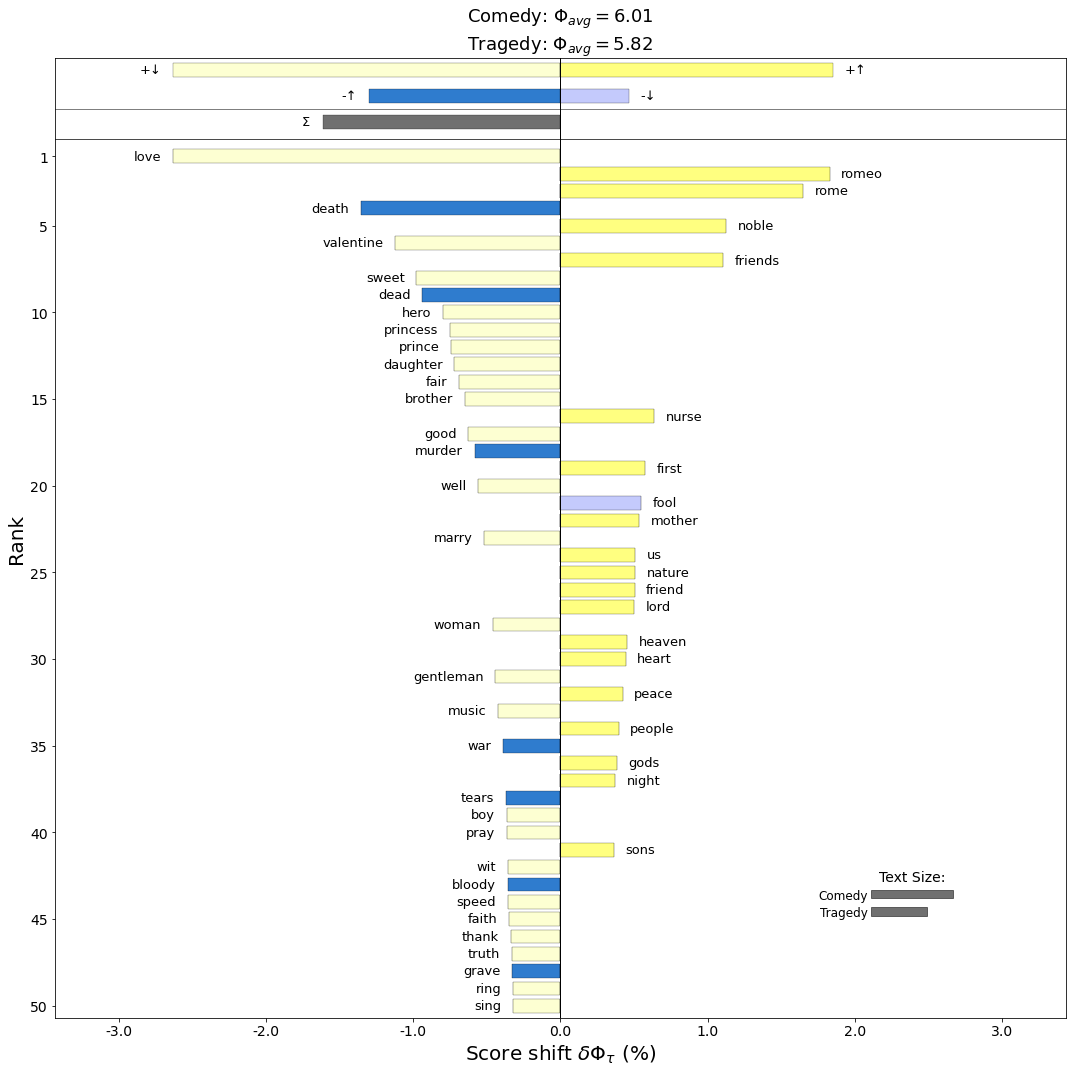

<AxesSubplot:title={'center':'Comedy: $\\Phi_{avg}=$6.01\nTragedy: $\\Phi_{avg}=$5.82'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [14]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1 = comedy_counts,
                                type2freq_2= tragedy_counts,
                                type2score_1='labMT_English', #Try 'NRC-emotion_anger_English' or 'NRC-emotion_sadness_English'
                                stop_lens=[(4,6)]
                                )

sentiment_shift.get_shift_graph(system_names = ['Comedy', 'Tragedy'],  width=15, height=15, cumulative_inset=False, details=True)

## 🛑  Interpretation & Analysis

What kind of claims could you make about Shakespeare's comedies vs tragedies based on the word shift graphs? Try to formulate it in one or two sentences.

In [ ]:
# Your claims here